# POS-TECH

## Descrição:

Trabalho que visa analisar dados sobre exportação de vinhos do ano de 2010 até o ano de 2024 provenientes do Estado do Rio Grande do Sul. 
As informações foras utilizadas do link: http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01

# Importação das Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. Capturar e Tratar Informações

In [2]:
## 1.1 Capturar as informações de um arquivo Excel:
dados_exportacao = pd.read_excel(r"e:\PÓS GRADUAÇÃO\Fase 1 - Data Analysis and Exploration\POS TECH\base_exportação_vinhos.xlsx");

## 1.2 Remover informações nulas que não serão utilizadas:
dados_exportacao = dados_exportacao.dropna()

## 1.3 Renomear colunas para facilitar a utilização em situações futuras:
dados_exportacao.columns = ["paises", "volume_em_kg", "valor", "ano", "tipo"]

## 1.4 Utilizar somente o tipo "Vinhos de mesa" na construção da análise, ou seja, remover todos os outros tipos como "espumantes", "uvas frescas", "uvas passas" e "suco de uva":
exportacao_vinhos_de_mesa = dados_exportacao.loc[dados_exportacao["tipo"] == "Vinhos de mesa"]
exportacao_vinhos_de_mesa

,paises,volume_em_kg,valor,ano,tipo
2,"Alemanha, República Democrática",27715.0,138666.0,2010,Vinhos de mesa
3,Angola,33557.0,189891.0,2010,Vinhos de mesa
6,Antilhas Holandesas,9810.0,12808.0,2010,Vinhos de mesa
11,Austrália,1823.0,17960.0,2010,Vinhos de mesa
13,Bahamas,3175.0,12759.0,2010,Vinhos de mesa
...,...,...,...,...,...
2107,Trinidade Tobago,64.0,199.0,2024,Vinhos de mesa
2109,Turquia,216.0,540.0,2024,Vinhos de mesa
2111,Uruguai,36729.0,62325.0,2024,Vinhos de mesa
2113,Venezuela,122922.0,199418.0,2024,Vinhos de mesa


# 2. Agrupar Informações - Por Ano

In [3]:
## 2.1 Função que vai somar e agrupar o Volume em KG que foi exportado - Por Ano:
def soma_volume_em_kg(df):
    volume_em_kg_agrupado = df.groupby("ano")["volume_em_kg"].sum().reset_index()
    return volume_em_kg_agrupado

## 2.2 Função que vai somar e agrupar o Valor que foi exportado - Por Ano:
def soma_valor(df):
    valor_agrupado = df.groupby("ano")["valor"].sum().reset_index()
    return valor_agrupado


# 3. Visualizações Agrupadas

## 3.1 Volume de Exportação de Vinhos de Mesa (2010–2024)

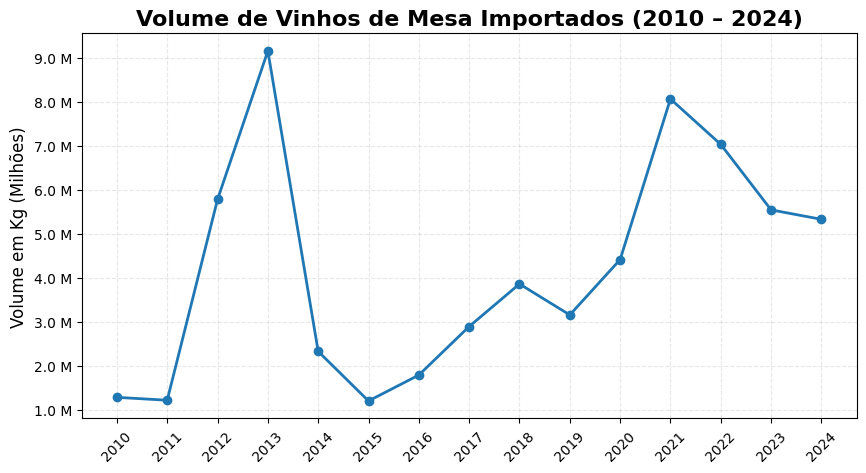

In [4]:
## 3.1.1 Chamar as funções criadas:
volume_em_kg_agrupado =  soma_volume_em_kg(exportacao_vinhos_de_mesa)

## 3.1.2 Criar visualização :
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(volume_em_kg_agrupado["ano"], volume_em_kg_agrupado["volume_em_kg"], marker='o', linewidth=2, color='tab:blue')

# 3.1.3 Títulos e rótulos:
plt.title("Volume de Vinhos de Mesa Importados (2010 – 2024)", fontsize=16, weight='bold')
ax.set_ylabel("Volume em Kg (Milhões)", fontsize=12)

# 3.1.4 Eixo X: 
anos = sorted(volume_em_kg_agrupado["ano"].unique())
ax.set_xticks(anos)
ax.set_xticklabels(anos, rotation=45)

# 3.1.5 Eixo Y: 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f} M'))

# 3.1.6 Layout
plt.grid(True, linestyle="--", alpha=0.3)

## 3.2 Valor de Exportação de Vinhos de Mesa (2010–2024)

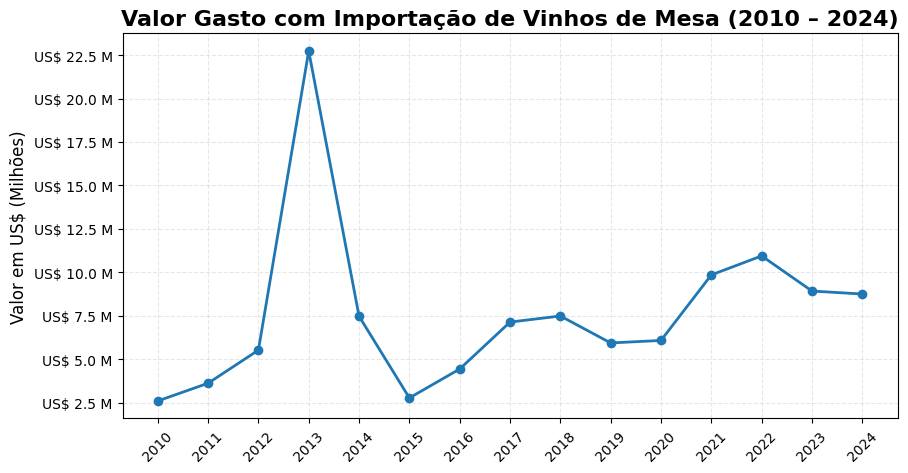

In [5]:
## 3.2.1 Chamar as funções criadas:
valor_agrupado =  soma_valor(exportacao_vinhos_de_mesa)

## 3.2.2 Criar visualização:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(valor_agrupado["ano"], valor_agrupado["valor"], marker='o', linewidth=2, color='tab:blue')

# 3.2.3 Títulos e rótulos:
plt.title("Valor Gasto com Importação de Vinhos de Mesa (2010 – 2024)", fontsize=16, weight='bold')
ax.set_ylabel("Valor em US$ (Milhões)", fontsize=12)

# 3.2.4 Eixo X: 
anos = sorted(valor_agrupado["ano"].unique())
ax.set_xticks(anos)
ax.set_xticklabels(anos, rotation=45)

# 3.2.5 Eixo Y: 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'US$ {x/1e6:.1f} M'))

# 3.2.6 Layout
plt.grid(True, linestyle="--", alpha=0.3)

## 3.3 Agrupando Volume e Valor (2010-2024)

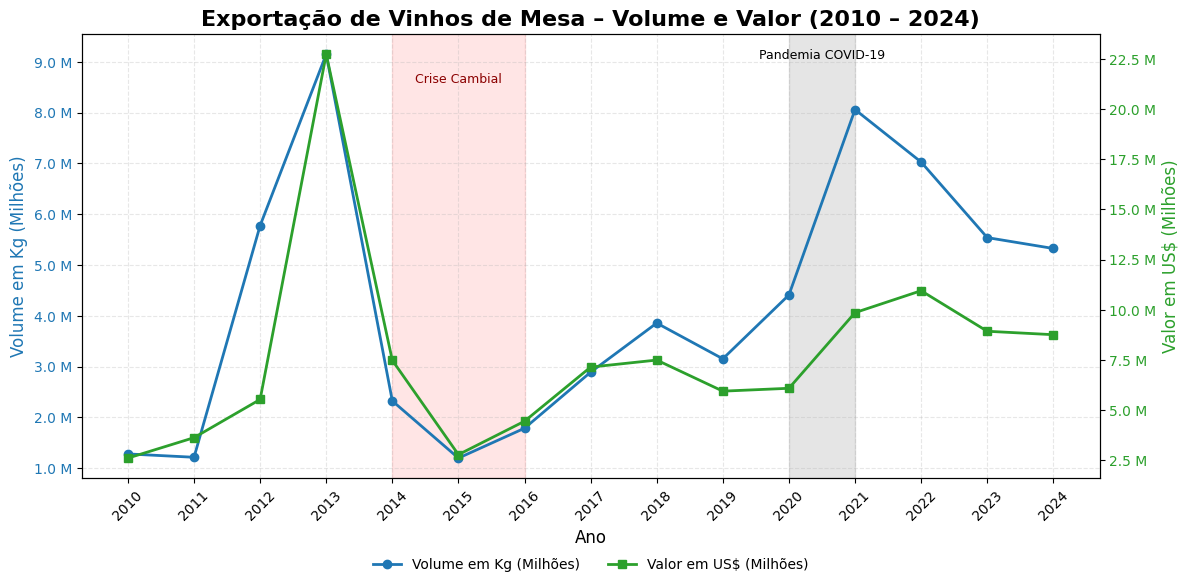

In [6]:
## 3.3.1 Criar visualização:
fig, ax1 = plt.subplots(figsize=(12, 6))

## 3.3.2 Eixo Y da esquerda – Volume
color1 = 'tab:blue'
ax1.set_xlabel("Ano", fontsize=12)
ax1.set_ylabel("Volume em Kg (Milhões)", color=color1, fontsize=12)

vol_anos = volume_em_kg_agrupado["ano"]
vol_valores = volume_em_kg_agrupado["volume_em_kg"] / 1e6
ax1.plot(vol_anos, vol_valores, marker='o', color=color1, label="Volume em Kg (Milhões)", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(vol_anos)
ax1.set_xticklabels(vol_anos, rotation=45)



## 3.3.3 Eixo Y da direita – Valor
ax2 = ax1.twinx()
color2 = 'tab:green'
val_anos = valor_agrupado["ano"]
val_valores = valor_agrupado["valor"] / 1e6
ax2.set_ylabel("Valor em US$ (Milhões)", color=color2, fontsize=12)
ax2.plot(val_anos, val_valores, marker='s', color=color2, label="Valor em US$ (Milhões)", linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)

# Formatar eixo Y (volume) com "M"
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f} M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f} M'))

## 3.3.4 Título
plt.title("Exportação de Vinhos de Mesa – Volume e Valor (2010 – 2024)", fontsize=16, weight='bold')

## 3.3.5 Grade
ax1.grid(True, linestyle="--", alpha=0.3)

## 3.3.6 Destaques de eventos
# Pandemia (2020–2021)
ax1.axvspan(2020, 2021, color='gray', alpha=0.2)
ax1.text(2020.5, ax1.get_ylim()[1]*0.95, 'Pandemia COVID-19', ha='center', fontsize=9, color='black')

# Crise Cambial (2014–2016)
ax1.axvspan(2014, 2016, color='red', alpha=0.1)
ax1.text(2015, ax1.get_ylim()[1]*0.9, 'Crise Cambial', ha='center', fontsize=9, color='darkred')

## 3.3.7 Legenda na parte inferior
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()

# 4. Maiores e Menores Exportadores - Volume (2010 - 2024)

In [7]:
## 4.1 Maiores Exportadores de cada ano
def maiores_volumes_paises_ano(df):
    resultado = exportacao_vinhos_de_mesa.loc[
        exportacao_vinhos_de_mesa.groupby('ano')['volume_em_kg'].idxmax()
    ].reset_index(drop=True)

    return resultado.sort_values(by='ano').reset_index(drop=True)

maiores_volumes_paises_ano(exportacao_vinhos_de_mesa)

,paises,volume_em_kg,valor,ano,tipo
0,Paraguai,510989.0,449197.0,2010,Vinhos de mesa
1,Estados Unidos,306787.0,1030254.0,2011,Vinhos de mesa
2,Rússia,4528176.0,2103968.0,2012,Vinhos de mesa
3,Rússia,5893291.0,14795694.0,2013,Vinhos de mesa
4,Paraguai,521847.0,908028.0,2014,Vinhos de mesa
5,Paraguai,495428.0,741370.0,2015,Vinhos de mesa
6,Paraguai,985739.0,1655417.0,2016,Vinhos de mesa
7,Paraguai,2393468.0,4274650.0,2017,Vinhos de mesa
8,Paraguai,3234168.0,5494321.0,2018,Vinhos de mesa
9,Paraguai,2419537.0,3826587.0,2019,Vinhos de mesa


In [8]:
## 4.2 Exportadores de cada ano
def menores_volumes_paises_ano(df):
    resultado = exportacao_vinhos_de_mesa.loc[
        exportacao_vinhos_de_mesa.groupby('ano')['volume_em_kg'].idxmin()
    ].reset_index(drop=True)

    return resultado.sort_values(by='ano').reset_index(drop=True)

menores_volumes_paises_ano(exportacao_vinhos_de_mesa)

,paises,volume_em_kg,valor,ano,tipo
0,Bolívia,54.0,282.0,2010,Vinhos de mesa
1,Nigéria,54.0,210.0,2011,Vinhos de mesa
2,Panamá,39.0,2262.0,2012,Vinhos de mesa
3,Quênia,6.0,4.0,2013,Vinhos de mesa
4,Suriname,6.0,19.0,2014,Vinhos de mesa
5,Suriname,453.0,713.0,2015,Vinhos de mesa
6,"Coreia, Republica Sul",8.0,20.0,2016,Vinhos de mesa
7,Guine Bissau,48.0,90.0,2017,Vinhos de mesa
8,Tailândia,8.0,45.0,2018,Vinhos de mesa
9,Equador,2.0,3.0,2019,Vinhos de mesa


# 5. Maiores e Menores Exportadores - Valor (2010 - 2024)

In [9]:
## 5.1 Maiores Exportadores de cada ano
def maiores_valor_paises_ano(df):
    resultado = exportacao_vinhos_de_mesa.loc[
        exportacao_vinhos_de_mesa.groupby('ano')['valor'].idxmax()
    ].reset_index(drop=True)

    return resultado.sort_values(by='ano').reset_index(drop=True)

maiores_valor_paises_ano(exportacao_vinhos_de_mesa)

,paises,volume_em_kg,valor,ano,tipo
0,Estados Unidos,228968.0,478630.0,2010,Vinhos de mesa
1,Estados Unidos,306787.0,1030254.0,2011,Vinhos de mesa
2,Rússia,4528176.0,2103968.0,2012,Vinhos de mesa
3,Rússia,5893291.0,14795694.0,2013,Vinhos de mesa
4,Reino Unido,305807.0,1373747.0,2014,Vinhos de mesa
5,Paraguai,495428.0,741370.0,2015,Vinhos de mesa
6,Paraguai,985739.0,1655417.0,2016,Vinhos de mesa
7,Paraguai,2393468.0,4274650.0,2017,Vinhos de mesa
8,Paraguai,3234168.0,5494321.0,2018,Vinhos de mesa
9,Paraguai,2419537.0,3826587.0,2019,Vinhos de mesa


In [10]:
## 5.2 Menores Exportadores de cada ano
def maiores_valor_paises_ano(df):
    resultado = exportacao_vinhos_de_mesa.loc[
        exportacao_vinhos_de_mesa.groupby('ano')['valor'].idxmin()
    ].reset_index(drop=True)

    return resultado.sort_values(by='ano').reset_index(drop=True)

maiores_valor_paises_ano(exportacao_vinhos_de_mesa)

,paises,volume_em_kg,valor,ano,tipo
0,Bolívia,54.0,282.0,2010,Vinhos de mesa
1,Nigéria,54.0,210.0,2011,Vinhos de mesa
2,Quênia,94.0,458.0,2012,Vinhos de mesa
3,Quênia,6.0,4.0,2013,Vinhos de mesa
4,Suriname,6.0,19.0,2014,Vinhos de mesa
5,Suriname,453.0,713.0,2015,Vinhos de mesa
6,"Coreia, Republica Sul",8.0,20.0,2016,Vinhos de mesa
7,Guine Bissau,48.0,90.0,2017,Vinhos de mesa
8,Malásia,15.0,33.0,2018,Vinhos de mesa
9,Equador,2.0,3.0,2019,Vinhos de mesa


# 6. 

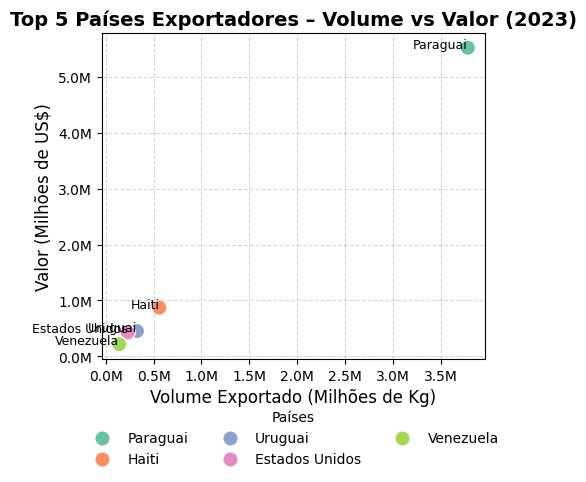

In [11]:
def scatter_valor_vs_volume_por_ano(df, ano):
    # Filtra dados do ano
    dados_ano = df[df['ano'] == ano]

    # Agrupa por país e seleciona top 5 por valor
    top_paises = (
        dados_ano
        .groupby('paises')[['volume_em_kg', 'valor']]
        .sum()
        .sort_values(by='valor', ascending=False)
        .head(5)
        .reset_index()
    )

    # Gráfico
    plt.figure(figsize=(5, 5))
    scatter = sns.scatterplot(
        data=top_paises,
        x='volume_em_kg',
        y='valor',
        hue='paises',
        palette='Set2',
        s=120
    )

    # Anotações com nome dos países
    for _, row in top_paises.iterrows():
        plt.text(row['volume_em_kg'], row['valor'], row['paises'], fontsize=9, ha='right')

    # Título e rótulos
    plt.title(f'Top 5 Países Exportadores – Volume vs Valor ({ano})', fontsize=14, weight='bold')
    plt.xlabel('Volume Exportado (Milhões de Kg)', fontsize=12)
    plt.ylabel('Valor (Milhões de US$)', fontsize=12)

    # Formata eixos em milhões
    scatter.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
    scatter.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

    # Grade e layout
    plt.grid(True, linestyle='--', alpha=0.5)

    # Legenda abaixo do gráfico
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3, frameon=False, title="Países")

    plt.tight_layout()
    plt.show()

scatter_valor_vs_volume_por_ano(exportacao_vinhos_de_mesa, 2023)

# 7. 

In [12]:
def evolucao_volume_valor_top5(df):
    import matplotlib.pyplot as plt

    # Agrupa por país e soma valor total
    top_paises = (
        df.groupby('paises')['valor']
        .sum()
        .sort_values(ascending=False)
        .head(5)
        .index.tolist()
    )

    # Filtra base apenas com top 5
    dados_top5 = df[df['paises'].isin(top_paises)]

    # Agrupa por país e ano, somando valores e volumes
    resumo = dados_top5.groupby(['ano', 'paises'])[['volume_em_kg', 'valor']].sum().reset_index()

    # Todos os anos únicos (garantir que apareçam no eixo X)
    anos = sorted(df['ano'].unique())

    # Gráfico de linhas
    fig, ax1 = plt.subplots(figsize=(12, 6))
    for pais in top_paises:
        linha = resumo[resumo['paises'] == pais]
        ax1.plot(linha['ano'], linha['valor']/1e6, label=f'{pais} – valor', linestyle='-', marker='o')

    ax1.set_ylabel('Valor Exportado (Milhões US$)', fontsize=12)
    ax1.set_xlabel('Ano', fontsize=12)
    ax1.set_title('Evolução do Valor Exportado – Top 5 Países (2010–2024)', fontsize=14, weight='bold')
    ax1.grid(True, linestyle='--', alpha=0.5)

    # Mostrar todos os anos no eixo X
    ax1.set_xticks(anos)
    ax1.set_xticklabels(anos, rotation=45)

    # Legenda na parte inferior
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.1),
        ncol=3,
        frameon=False
    )

    plt.tight_layout()
    plt.show()

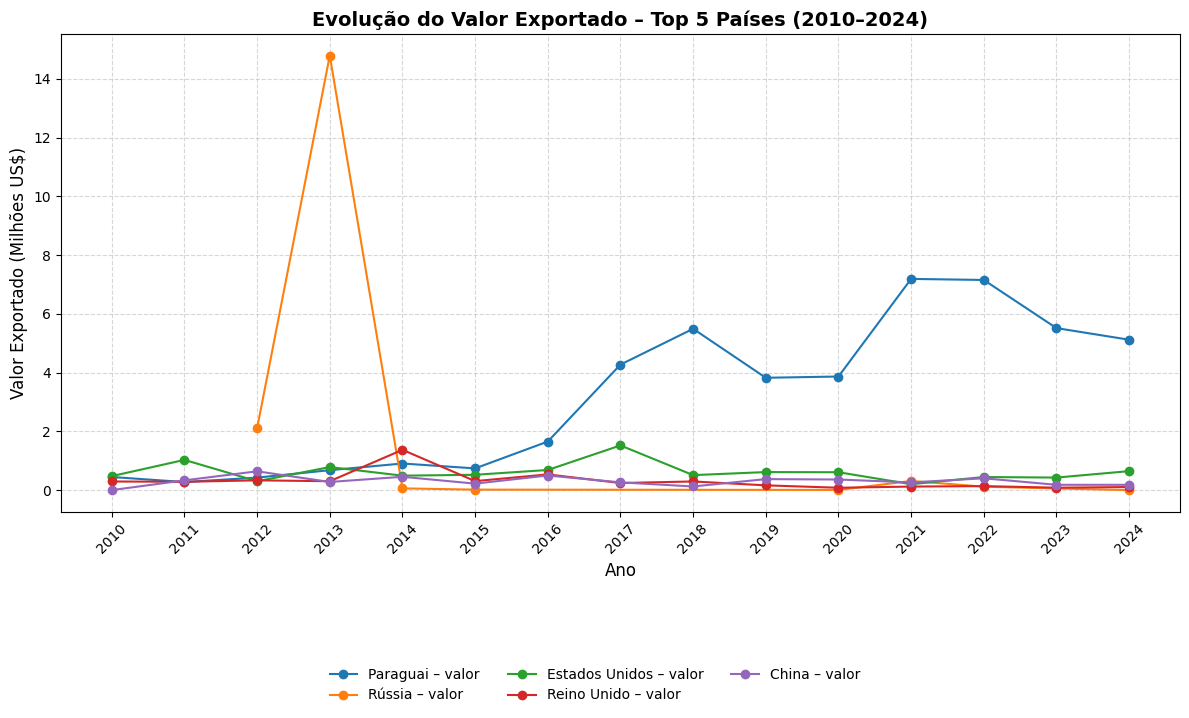

In [13]:
evolucao_volume_valor_top5(exportacao_vinhos_de_mesa)

# 8.

In [14]:
def graficos_individuais_top5(df):
    top_paises = (
        df.groupby('paises')['valor']
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .index.tolist()
    )

    for pais in top_paises:
        dados_pais = df[df['paises'] == pais].groupby('ano')[['volume_em_kg', 'valor']].sum().reset_index()

        fig, ax1 = plt.subplots(figsize=(12, 5))

        # Eixo esquerdo – Volume
        ax1.set_title(f'{pais} – Volume x Valor (2010 – 2024)', fontsize=14, weight='bold')
        ax1.set_xlabel('Ano', fontsize=12)
        ax1.set_ylabel('Volume  Kg', color='tab:blue', fontsize=12)
        vol = dados_pais['volume_em_kg']
        ax1.plot(dados_pais['ano'], vol / 1e6, color='tab:blue', marker='o', label='Volume')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        def volume_formatter(x, _):
            valor_real = x * 1e6  # Reverter escala para checar valor original
            if valor_real >= 1_000_000:
                return f'{x:.1f}M'
            elif valor_real >= 1_000:
                return f'{valor_real/1_000:.1f} mil'
            elif valor_real > 0:
                return f'{valor_real:.0f}'
            return ''

        ax1.yaxis.set_major_formatter(ticker.FuncFormatter(volume_formatter))

        volume_max = max((vol / 1e6).max(), 0.01)
        ax1.set_ylim(0, volume_max * 1.2)

        # Mostrar todos os anos
        anos = sorted(df['ano'].unique())
        ax1.set_xticks(anos)
        ax1.set_xticklabels(anos, rotation=45)

        # Eixo direito – Valor
        ax2 = ax1.twinx()
        val = dados_pais['valor']
        ax2.set_ylabel('Valor - US$', color='tab:green', fontsize=12)
        ax2.plot(dados_pais['ano'], val / 1e6, color='tab:green', marker='s', label='Valor')
        ax2.tick_params(axis='y', labelcolor='tab:green')

        def valor_formatter(x, _):
            valor_real = x * 1e6
            if valor_real >= 1_000_000:
                return f'{x:.1f}M'
            elif valor_real >= 1_000:
                return f'{valor_real/1_000:.1f} mil'
            elif valor_real > 0:
                return f'{valor_real:.0f}'
            return ''

        ax2.yaxis.set_major_formatter(ticker.FuncFormatter(valor_formatter))

        valor_max = max((val / 1e6).max(), 0.01)
        ax2.set_ylim(0, valor_max * 1.2)

        # Eventos especiais
        ax1.axvspan(2020, 2021, color='gray', alpha=0.2)
        ax1.text(2020.5, volume_max * 1.1, 'Pandemia COVID-19', ha='center', fontsize=9, color='black')
        ax1.axvspan(2014, 2016, color='red', alpha=0.1)
        ax1.text(2015, volume_max * 0.9, 'Crise Cambial', ha='center', fontsize=9, color='darkred')

        # Legenda
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        fig.legend(
            lines1 + lines2,
            labels1 + labels2,
            loc='upper center',
            bbox_to_anchor=(0.5, -0.03),
            ncol=2,
            frameon=False
        )

        ax1.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

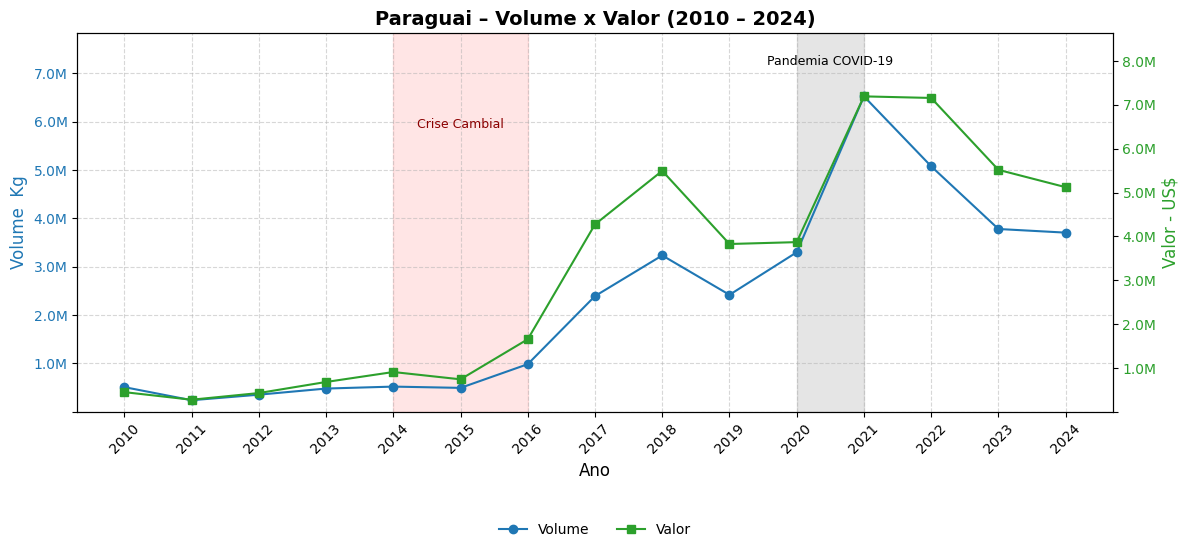

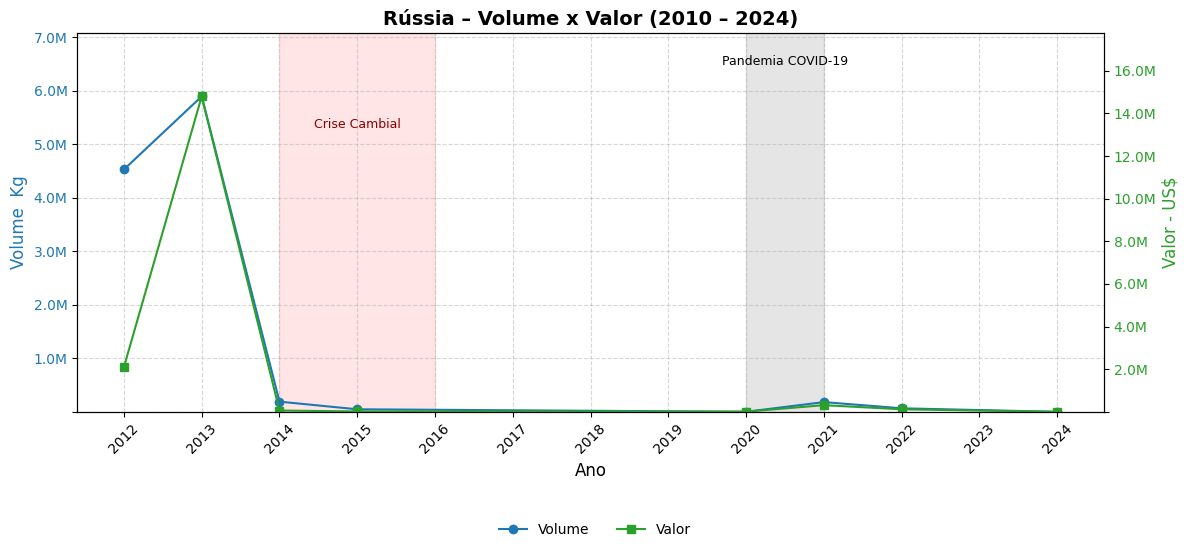

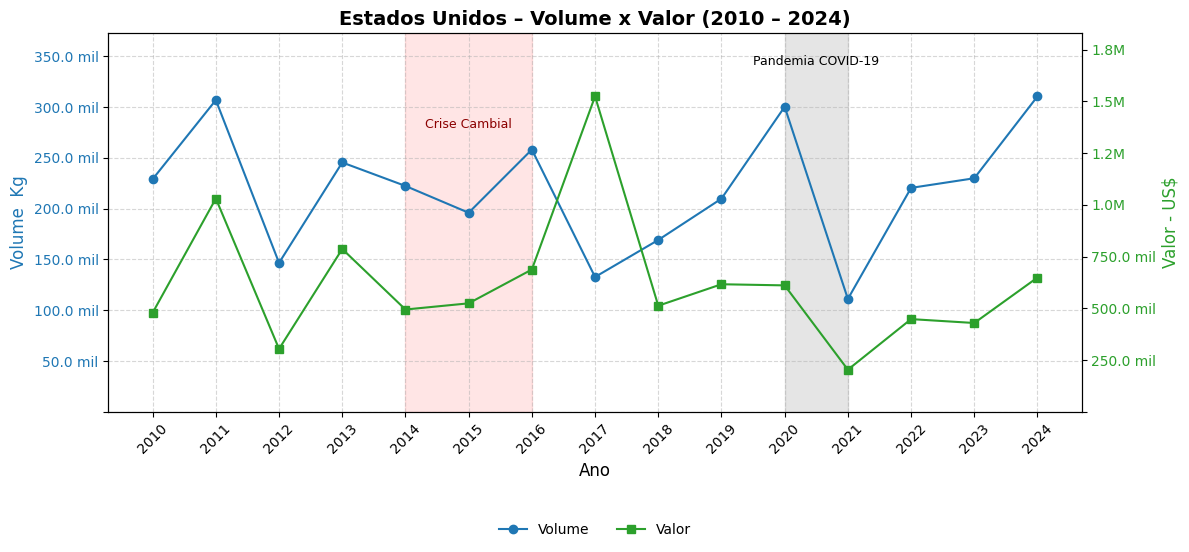

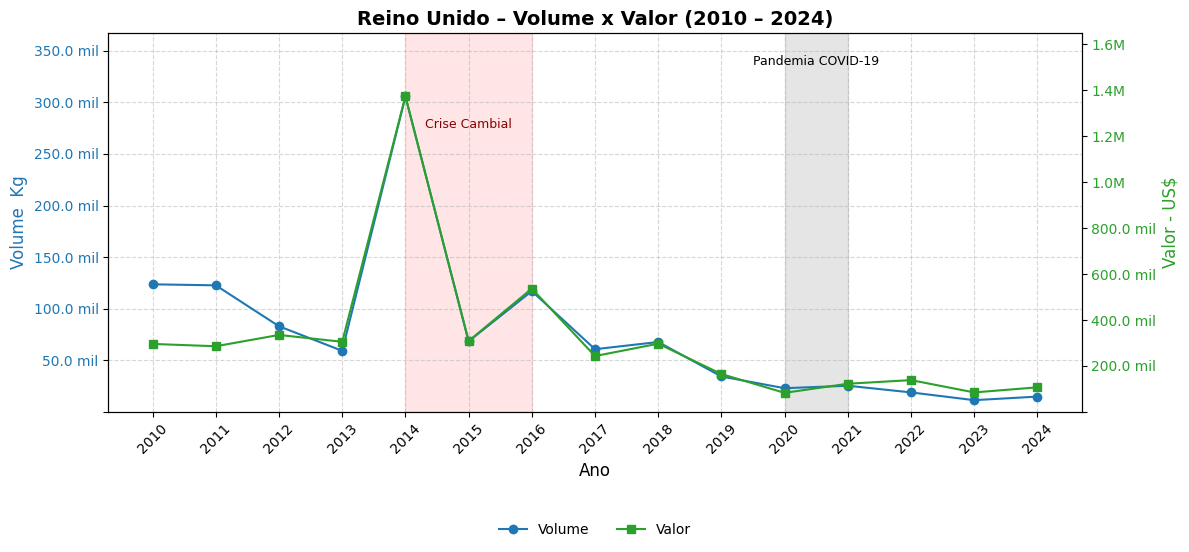

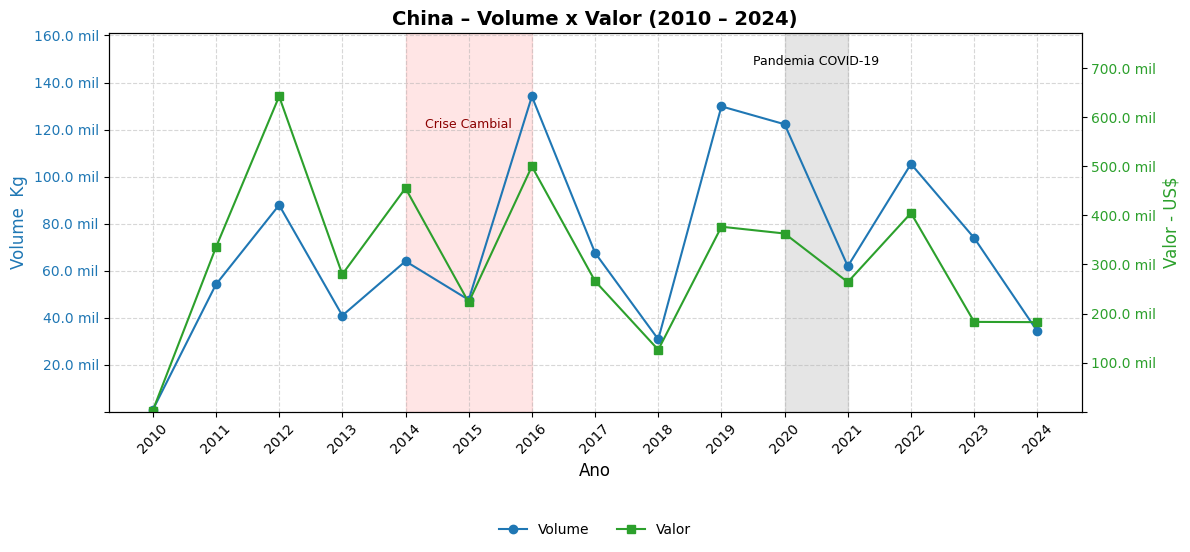

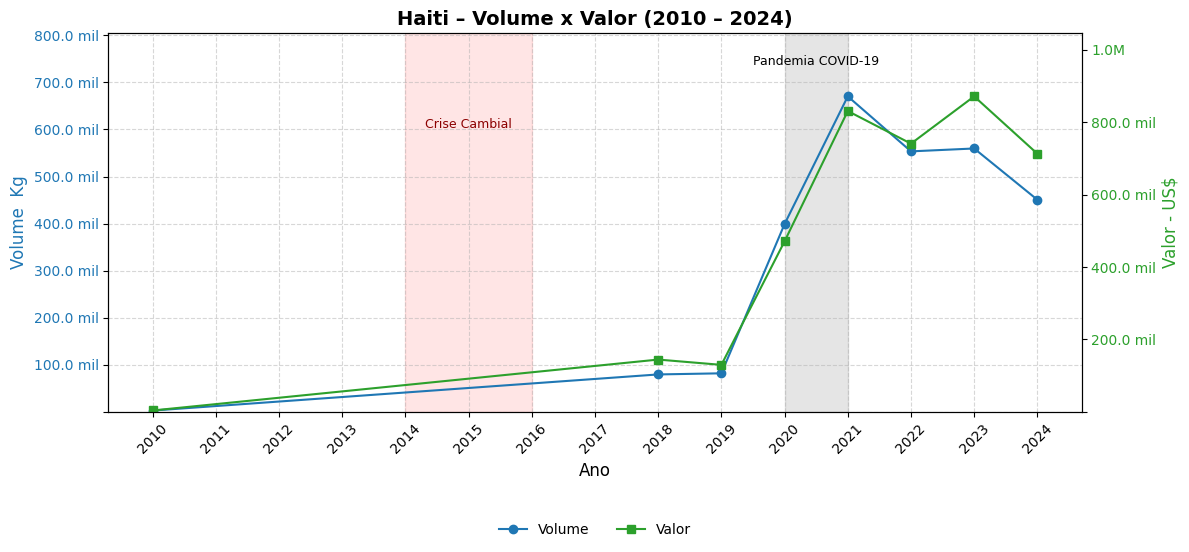

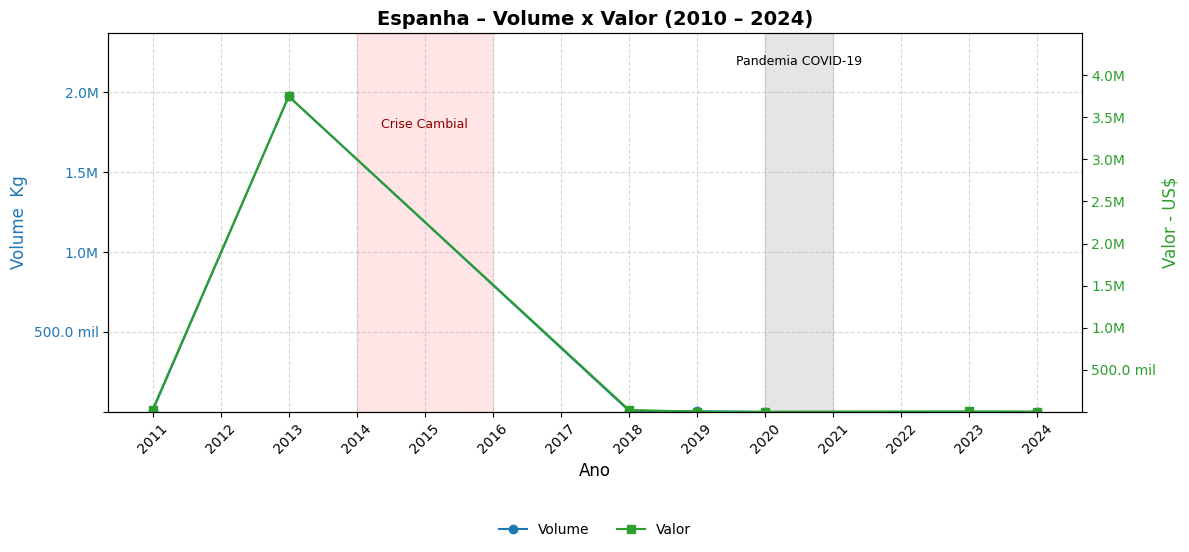

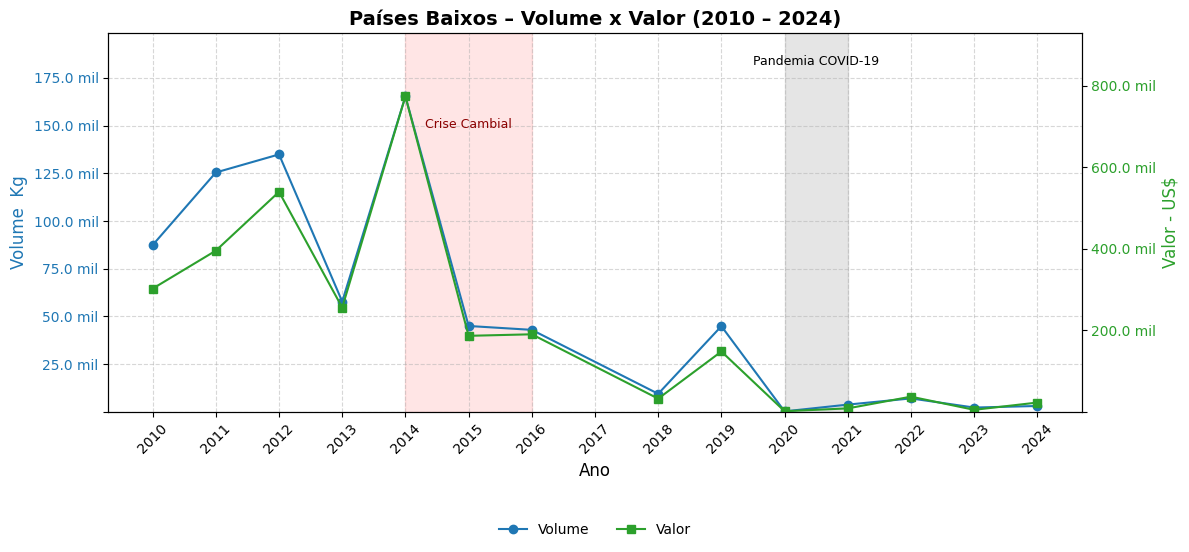

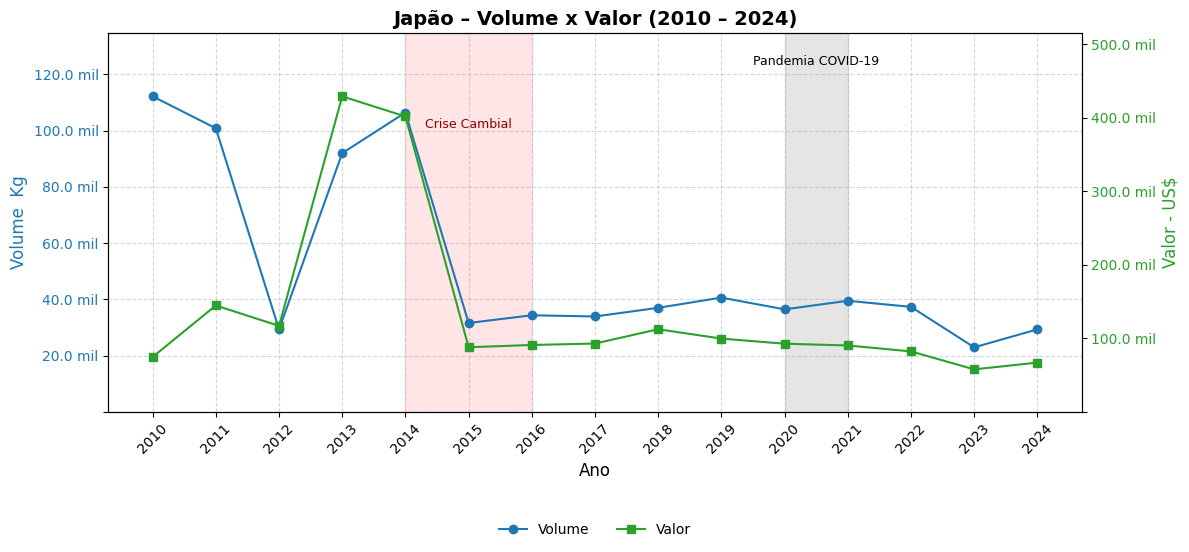

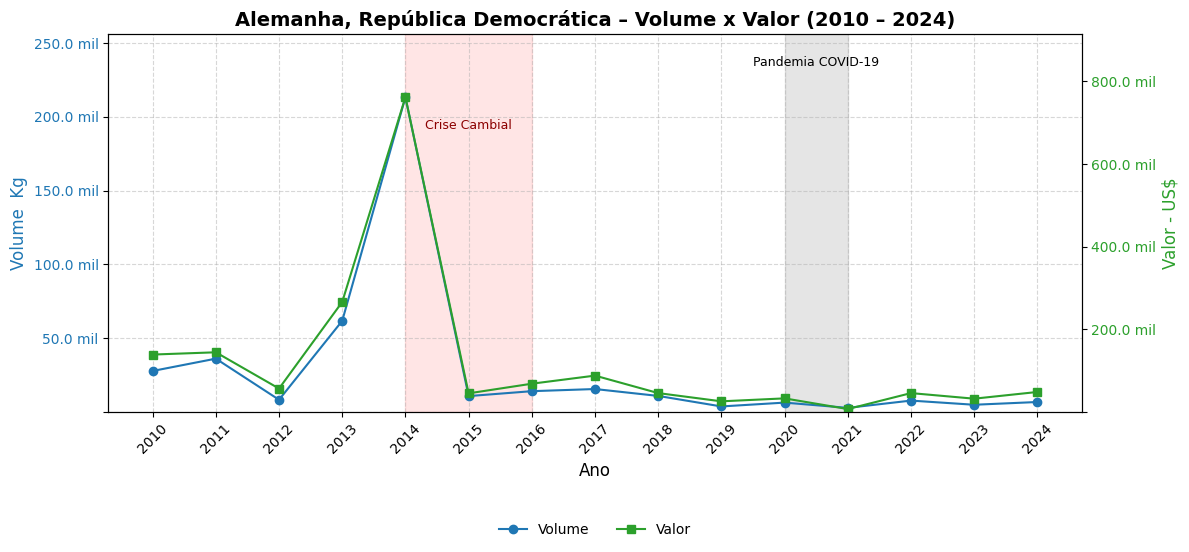

In [15]:
graficos_individuais_top5(exportacao_vinhos_de_mesa)

In [16]:

def graficos_individuais_top5(df):
    top_paises = (
        df.groupby('paises')['valor']
        .sum()
        .sort_values(ascending=False)
        .head(5)
        .index.tolist()
    )

    for pais in top_paises:
        dados_pais = df[df['paises'] == pais].groupby('ano')[['volume_em_kg', 'valor']].sum().reset_index()

        fig, ax1 = plt.subplots(figsize=(10, 5))

        # Eixo esquerdo – Volume
        ax1.set_title(f'{pais} – Volume x Valor (2010–2024)', fontsize=14, weight='bold')
        ax1.set_xlabel('Ano', fontsize=12)
        ax1.set_ylabel('Volume (Milhões Kg)', color='tab:blue', fontsize=12)
        vol = dados_pais['volume_em_kg']
        ax1.plot(dados_pais['ano'], vol / 1e6, color='tab:blue', marker='o', label='Volume')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        # Função de formatação do eixo Y para Volume
        def volume_formatter(x, _):
            valor_real = x * 1e6  # Reverter escala para checar valor original
            if valor_real >= 1_000_000:
                return f'{x:.1f}M'
            elif valor_real >= 1_000:
                return f'{valor_real/1_000:.1f} mil'
            elif valor_real > 0:
                return f'{valor_real:.0f}'
            return ''

        ax1.yaxis.set_major_formatter(ticker.FuncFormatter(volume_formatter))

        volume_max = max((vol / 1e6).max(), 0.01)
        ax1.set_ylim(0, volume_max * 1.2)

        # Mostrar todos os anos
        anos = sorted(df['ano'].unique())
        ax1.set_xticks(anos)
        ax1.set_xticklabels(anos, rotation=45)

        # Eixo direito – Valor
        ax2 = ax1.twinx()
        val = dados_pais['valor']
        ax2.set_ylabel('Valor (Milhões US$)', color='tab:green', fontsize=12)
        ax2.plot(dados_pais['ano'], val / 1e6, color='tab:green', marker='s', label='Valor')
        ax2.tick_params(axis='y', labelcolor='tab:green')

        # Função de formatação do eixo Y para Valor
        def valor_formatter(x, _):
            valor_real = x * 1e6
            if valor_real >= 1_000_000:
                return f'{x:.1f}M'
            elif valor_real >= 1_000:
                return f'{valor_real/1_000:.1f} mil'
            elif valor_real > 0:
                return f'{valor_real:.0f}'
            return ''

        ax2.yaxis.set_major_formatter(ticker.FuncFormatter(valor_formatter))

        valor_max = max((val / 1e6).max(), 0.01)
        ax2.set_ylim(0, valor_max * 1.2)

        # Adicionando eventos especiais relacionados à economia
        # Exemplo de eventos:
        ax1.axvspan(2020, 2021, color='gray', alpha=0.2)  # Pandemia COVID-19
        ax1.text(2020.5, volume_max * 1.1, 'Pandemia COVID-19', ha='center', fontsize=9, color='black')

        ax1.axvspan(2014, 2016, color='red', alpha=0.1)  # Crise Cambial
        ax1.text(2015, volume_max * 0.9, 'Crise Cambial', ha='center', fontsize=9, color='darkred')

        ax1.axvspan(2015, 2016, color='orange', alpha=0.3)  # Valorização do Dólar
        ax1.text(2015.5, volume_max * 0.8, 'Valorização do Dólar', ha='center', fontsize=9, color='darkorange')

        ax1.axvspan(2018, 2020, color='yellow', alpha=0.3)  # Alta do Petróleo (Influência nos preços)
        ax1.text(2019, volume_max * 0.7, 'Alta do Petróleo', ha='center', fontsize=9, color='darkgoldenrod')

        # Legenda
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        fig.legend(
            lines1 + lines2,
            labels1 + labels2,
            loc='upper center',
            bbox_to_anchor=(0.5, -0.03),
            ncol=2,
            frameon=False
        )

        ax1.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()